# Clustering Tests

Here we play with DBSCAN in high dimensional spaces, using the subsampled dataset from [here](subsampled_Clustering_tests.ipynb)

In [7]:
%reload_ext autoreload
%autoreload 2
from jokedictfuncs import *
from sklearn.utils.random import sample_without_replacement as sampler

import warnings
warnings.filterwarnings('ignore')

import numpy as np

In [3]:
with open('test.data','rb') as frick:
    table_sub, data_sub = pickle.load(frick)

In [13]:
X = Analysis.makeFeaturesIDF(data_sub, max_features=100000)

X.shape (10000, 15029)
X_redux.shape (10000, 1000)


In [16]:
def runDBSCAN(X, r_components=1000):
    X_redux = Analysis.dimensionReduction(X, pca_components=r_components)
    dbs = Analysis.cluster(X_redux)
    core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
    core_samples_mask[dbs.core_sample_indices_] = True
    labels = dbs.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_redux, labels))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X_redux[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X_redux[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Clusters: %d, with %d components' % (n_clusters_, r_components))
    plt.show()

X.shape (10000, 15029)
X_redux.shape (10000, 1000)
Estimated number of clusters: 14
Estimated number of noise points: 5708
Silhouette Coefficient: 0.141


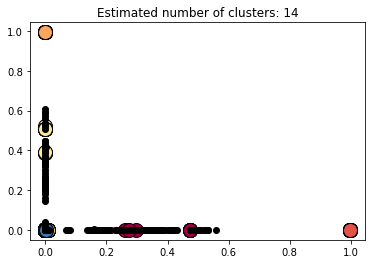

In [17]:
runDBSCAN(X, r_components=1000)

X.shape (10000, 15029)
X_redux.shape (10000, 50)
Estimated number of clusters: 14
Estimated number of noise points: 126
Silhouette Coefficient: 0.789


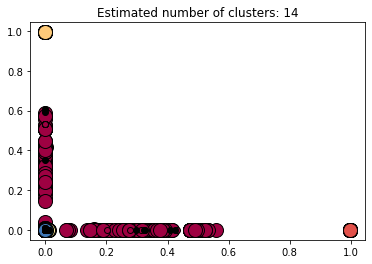

In [19]:
runDBSCAN(X, r_components=50)